<a href="https://colab.research.google.com/github/Artem-k0o/First-steps/blob/main/Are_movies_getting_worse%3F%20(good%20%3E%3D%207).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
titles=pd.read_csv('/content/title.basics (1).tsv',delimiter='\t')
titles.head()

<ipython-input-31-85347e7eaafd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles=pd.read_csv('/content/title.basics (1).tsv',delimiter='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [32]:
titles.groupby('titleType')['tconst'].count()

,tconst
titleType,
movie,709387
short,1049663
tvEpisode,8863521
tvMiniSeries,60414
tvMovie,150226
tvPilot,1
tvSeries,278495
tvShort,10590
tvSpecial,51641


In [33]:
movie_db=titles[(titles['titleType']=='movie') | (titles['titleType']=='tvMovie')]

In [34]:
counts_by_year=movie_db.groupby('startYear')['tconst'].count().reset_index()
print(counts_by_year)

    startYear  tconst
0        1888       1
1        1894       1
2        1896       1
3        1897       2
4        1898       7
..        ...     ...
133      2027      29
134      2028       4
135      2029       1
136      2031       1
137        \N  108426

[138 rows x 2 columns]


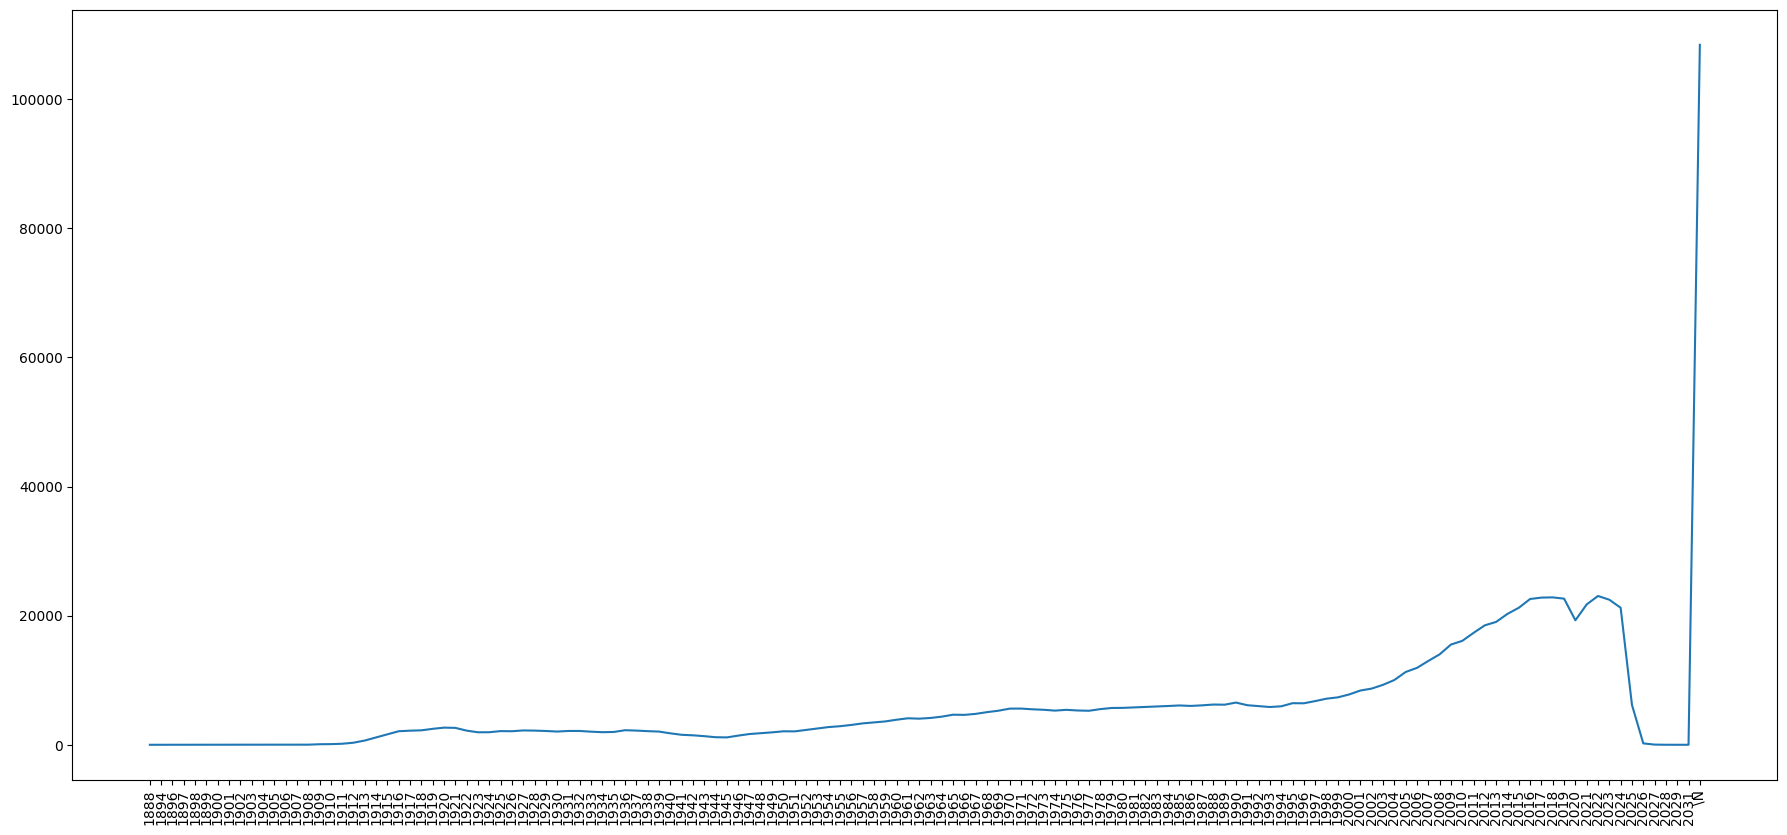

In [35]:
plt.figure(figsize=(22, 10))
plt.plot(counts_by_year['startYear'],counts_by_year['tconst'])
plt.xticks(rotation=90)
plt.show()

In [36]:
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859613 entries, 8 to 11523735
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          859613 non-null  object
 1   titleType       859613 non-null  object
 2   primaryTitle    859611 non-null  object
 3   originalTitle   859611 non-null  object
 4   isAdult         859613 non-null  object
 5   startYear       859613 non-null  object
 6   endYear         859613 non-null  object
 7   runtimeMinutes  859613 non-null  object
 8   genres          859613 non-null  object
dtypes: object(9)
memory usage: 65.6+ MB


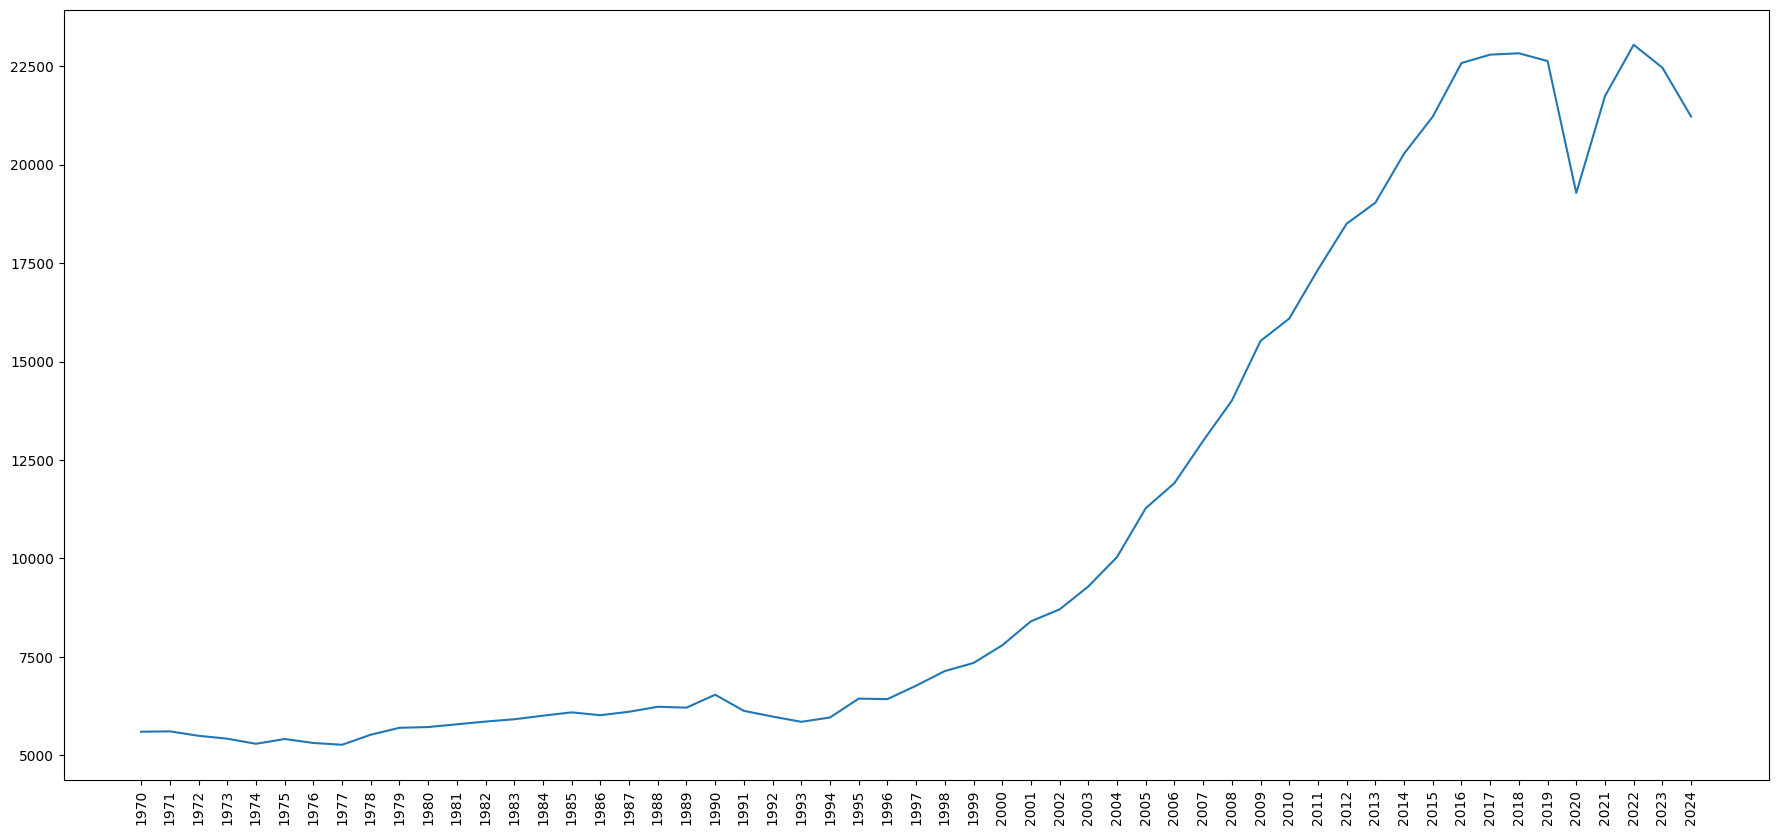

In [37]:
movie_db=movie_db[movie_db['startYear']!='\\N']
movie_db=movie_db[(movie_db['startYear'].astype(int)>=1970) & (movie_db['startYear'].astype(int)<=2024)]
counts_by_year=movie_db.groupby('startYear')['tconst'].count().reset_index()
plt.figure(figsize=(22, 10))
plt.plot(counts_by_year['startYear'],counts_by_year['tconst'])
plt.xticks(rotation=90)
plt.show()

In [38]:
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600213 entries, 11631 to 11523735
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          600213 non-null  object
 1   titleType       600213 non-null  object
 2   primaryTitle    600211 non-null  object
 3   originalTitle   600211 non-null  object
 4   isAdult         600213 non-null  object
 5   startYear       600213 non-null  object
 6   endYear         600213 non-null  object
 7   runtimeMinutes  600213 non-null  object
 8   genres          600213 non-null  object
dtypes: object(9)
memory usage: 45.8+ MB


In [39]:
movie_db.groupby('runtimeMinutes')['tconst'].count().reset_index()

,runtimeMinutes,tconst
0,1,24
1,10,96
2,100,11032
3,10062,1
4,101,3699
...,...,...
512,960,2
513,97,6130
514,98,6098
515,99,4390


In [40]:
ratings=pd.read_csv('/content/title.ratings.tsv',delimiter='\t')
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2141
1,tt0000002,5.5,290
2,tt0000003,6.4,2179
3,tt0000004,5.3,186
4,tt0000005,6.2,2912


In [41]:
movie_ratings_db=pd.merge(movie_db,ratings,how='left',on='tconst')
movie_ratings_db.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime",NaN,NaN
1,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.3,31.0
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,91448.0
3,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,118,"Drama,War",6.4,371.0
4,tt0038086,movie,Shiva und die Galgenblume,Shiva und die Galgenblume,0,1993,\N,\N,Thriller,7.0,27.0


In [42]:
movie_ratings_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600213 entries, 0 to 600212
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          600213 non-null  object 
 1   titleType       600213 non-null  object 
 2   primaryTitle    600211 non-null  object 
 3   originalTitle   600211 non-null  object 
 4   isAdult         600213 non-null  object 
 5   startYear       600213 non-null  object 
 6   endYear         600213 non-null  object 
 7   runtimeMinutes  600213 non-null  object 
 8   genres          600213 non-null  object 
 9   averageRating   321032 non-null  float64
 10  numVotes        321032 non-null  float64
dtypes: float64(2), object(9)
memory usage: 50.4+ MB


In [43]:
movie_ratings_db=movie_ratings_db.dropna()
movie_ratings_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321031 entries, 1 to 600211
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          321031 non-null  object 
 1   titleType       321031 non-null  object 
 2   primaryTitle    321031 non-null  object 
 3   originalTitle   321031 non-null  object 
 4   isAdult         321031 non-null  object 
 5   startYear       321031 non-null  object 
 6   endYear         321031 non-null  object 
 7   runtimeMinutes  321031 non-null  object 
 8   genres          321031 non-null  object 
 9   averageRating   321031 non-null  float64
 10  numVotes        321031 non-null  float64
dtypes: float64(2), object(9)
memory usage: 29.4+ MB


In [44]:
movie_ratings_db.groupby('runtimeMinutes')['tconst'].count().reset_index()

,runtimeMinutes,tconst
0,1,4
1,10,11
2,100,8603
3,10062,1
4,101,3030
...,...,...
415,960,1
416,97,4998
417,98,4986
418,99,3646


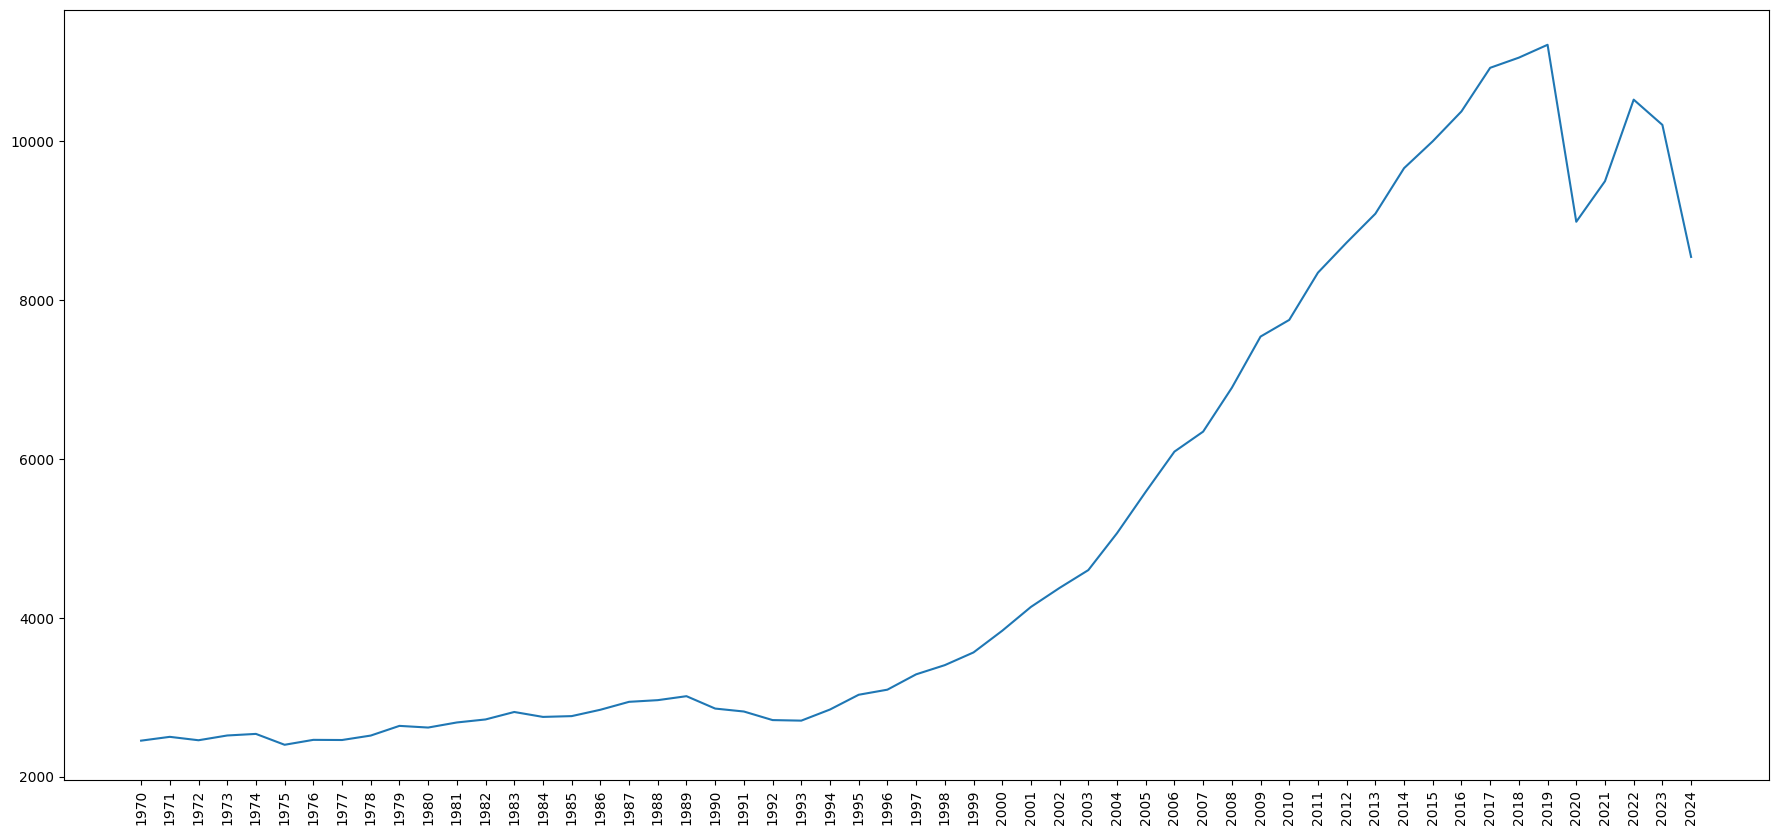

In [45]:
movie_ratings_db=movie_ratings_db[movie_ratings_db['runtimeMinutes']!='\\N']
movie_ratings_db=movie_ratings_db[(movie_ratings_db['runtimeMinutes'].astype(int)>=30) & (movie_ratings_db['runtimeMinutes'].astype(int)<=360)]
counts_by_year2=movie_ratings_db.groupby('startYear')['tconst'].count().reset_index()
plt.figure(figsize=(22, 10))
plt.plot(counts_by_year2['startYear'],counts_by_year2['tconst'])
plt.xticks(rotation=90)
plt.show()

In [46]:
movie_ratings_db=movie_ratings_db[movie_ratings_db['numVotes']>=100]
movie_ratings_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126915 entries, 2 to 600203
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          126915 non-null  object 
 1   titleType       126915 non-null  object 
 2   primaryTitle    126915 non-null  object 
 3   originalTitle   126915 non-null  object 
 4   isAdult         126915 non-null  object 
 5   startYear       126915 non-null  object 
 6   endYear         126915 non-null  object 
 7   runtimeMinutes  126915 non-null  object 
 8   genres          126915 non-null  object 
 9   averageRating   126915 non-null  float64
 10  numVotes        126915 non-null  float64
dtypes: float64(2), object(9)
memory usage: 11.6+ MB


In [47]:
def categorize(value):
    if value < 1000:
        return 'Low'
    elif 1000 <= value < 10000:
        return 'Medium'
    elif 10000 <= value < 50000:
        return 'High'
    elif 50000 <= value < 100000:
        return 'Enormous'
    elif 100000 <= value < 500000:
        return 'Big AF'
    else:
        return 'Absolute'
movie_ratings_db['numvotes_category'] = movie_ratings_db['numVotes'].apply(categorize)
movie_ratings_db.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numvotes_category
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,91448.0,Enormous
3,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,118,"Drama,War",6.4,371.0,Low
5,tt0038687,movie,Let There Be Light,Let There Be Light,0,1980,\N,58,"Documentary,War",7.4,2081.0,Medium
6,tt0039442,movie,"Habla, mudita","Habla, mudita",0,1973,\N,88,Drama,6.1,173.0,Low
7,tt0044952,movie,Nagarik,Nagarik,0,1977,\N,127,Drama,7.9,246.0,Low


In [48]:
def categorize_rating(value):
    if value < 4:
        return 'shit'
    elif 4 <= value < 7:
        return 'mid'
    elif 7 <= value < 8.5:
        return 'good'
    else:
        return 'amazing'
movie_ratings_db['rating_category'] = movie_ratings_db['averageRating'].apply(categorize_rating)
movie_ratings_db.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numvotes_category,rating_category
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,91448.0,Enormous,mid
3,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,118,"Drama,War",6.4,371.0,Low,mid
5,tt0038687,movie,Let There Be Light,Let There Be Light,0,1980,\N,58,"Documentary,War",7.4,2081.0,Medium,good
6,tt0039442,movie,"Habla, mudita","Habla, mudita",0,1973,\N,88,Drama,6.1,173.0,Low,mid
7,tt0044952,movie,Nagarik,Nagarik,0,1977,\N,127,Drama,7.9,246.0,Low,good


In [49]:
movie_ratings_db.groupby(['startYear','numvotes_category','rating_category']).agg({'averageRating': 'mean', 'numVotes': 'mean', 'tconst': 'count'})

averageRating       numVotes  \
startYear numvotes_category rating_category                                 
1970      Big AF            good                  7.500000  114940.500000   
          Enormous          good                  7.450000   67941.500000   
                            mid                   6.000000   55543.000000   
          High              good                  7.433333   21563.625000   
                            mid                   6.671429   18460.571429   
...                                                    ...            ...   
2024      Low               shit                  3.201880     292.195489   
          Medium            amazing               8.798361    2359.868852   
                            good                  7.545423    2628.422535   
                            mid                   5.769479    2879.116697   
                            shit                  3.216667    2141.611111   

                                             tconst  
startYear numvotes_category rating_category          
1970      Big AF            good                  2  
          Enormous          good                  2  
                            mid                   1  
          High              good                 24  
                            mid                   7  
...                                             ...  
2024      Low               shit                266  
          Medium            amazing              61  
                            good                284  
                            mid                 557  
                            shit                 36  

[956 rows x 3 columns]

In [50]:
# Group by all three columns and count tconst
grouped = movie_ratings_db.groupby(['startYear', 'numvotes_category', 'rating_category']).agg({'averageRating': 'mean', 'numVotes': 'mean', 'tconst': 'count'}).rename(columns={'tconst': 'count'})

# Group by only 'startYear' and 'numvotes_category' to get total count per main category
total_counts = movie_ratings_db.groupby(['startYear', 'numvotes_category'])['tconst'].count().rename('total_count')

# Merge to calculate 'pct'
grouped = grouped.merge(total_counts, left_index=True, right_index=True)
grouped['pct'] = grouped['count'] / grouped['total_count']
grouped = grouped.reset_index()
print(grouped)

    startYear numvotes_category rating_category  averageRating       numVotes  \
0        1970            Big AF            good       7.500000  114940.500000   
1        1970          Enormous            good       7.450000   67941.500000   
2        1970          Enormous             mid       6.000000   55543.000000   
3        1970              High            good       7.433333   21563.625000   
4        1970              High             mid       6.671429   18460.571429   
..        ...               ...             ...            ...            ...   
951      2024               Low            shit       3.201880     292.195489   
952      2024            Medium         amazing       8.798361    2359.868852   
953      2024            Medium            good       7.545423    2628.422535   
954      2024            Medium             mid       5.769479    2879.116697   
955      2024            Medium            shit       3.216667    2141.611111   

     count  total_count    

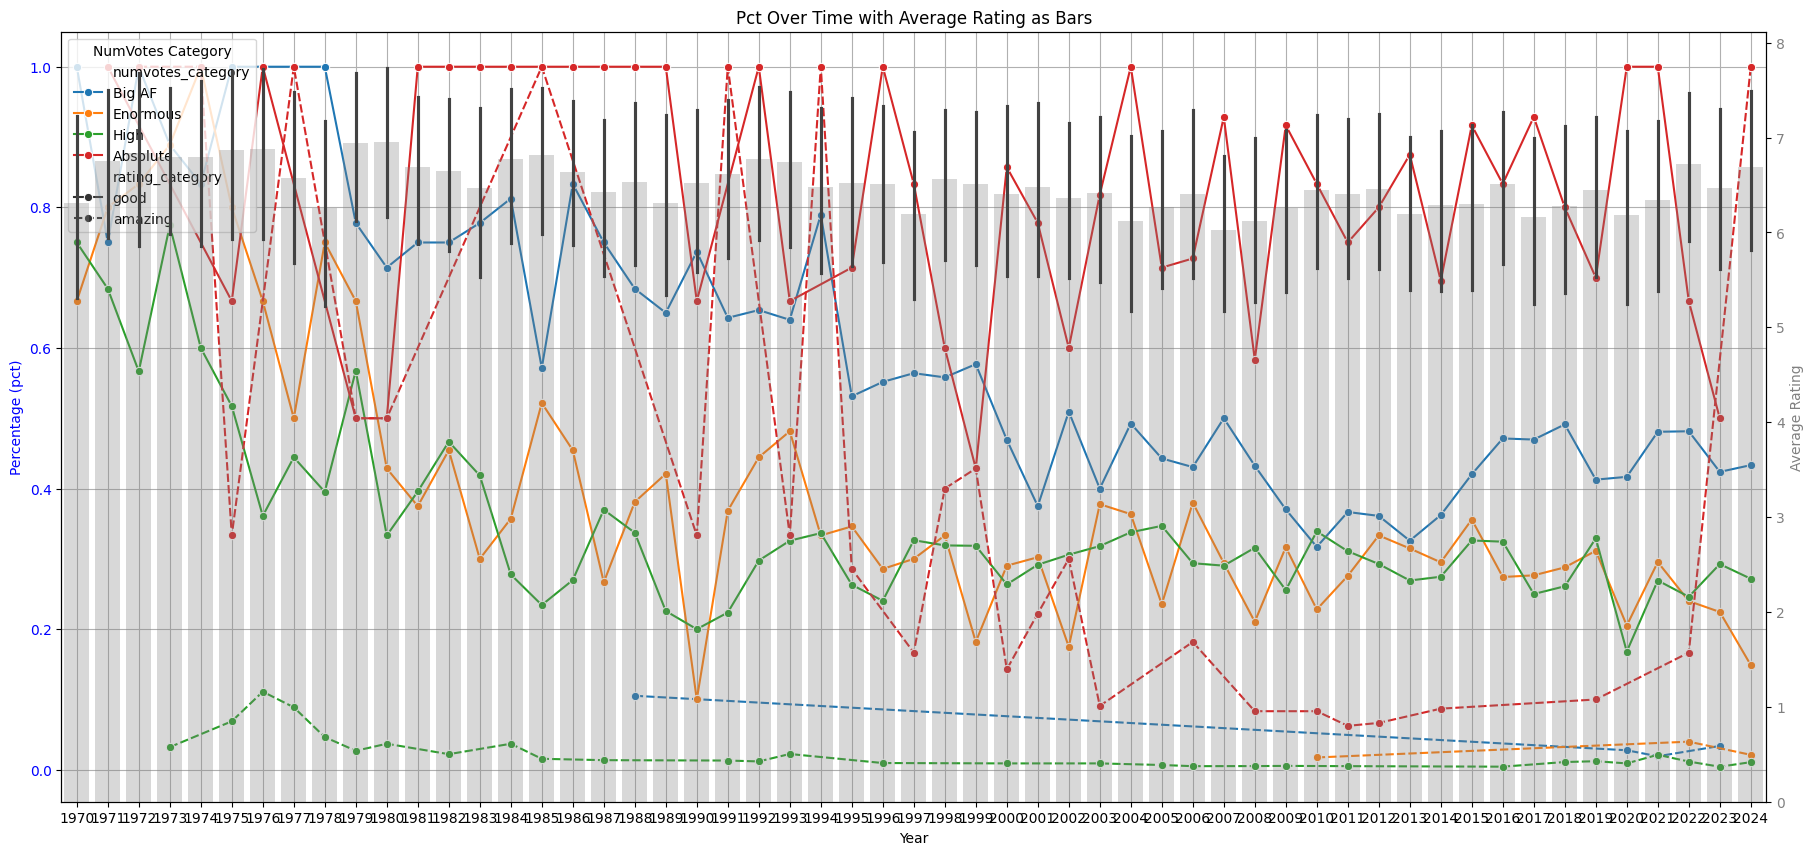

In [51]:
# Plot 'pct' over time for each 'numvotes_category'

grouped2=grouped[(grouped['numvotes_category'].isin(['High','Enormous','Big AF','Absolute']))&(grouped['rating_category'].isin(['good','amazing']))]
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped2, x='startYear', y='pct', hue='numvotes_category',style='rating_category', marker='o')

# Formatting
ax1.set_ylabel('Percentage (pct)', color='blue')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(title='NumVotes Category', loc='upper left')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'averageRating'
sns.barplot(data=grouped, x='startYear', y='averageRating', alpha=0.3, color='gray', ax=ax2)
ax2.set_ylabel('Average Rating', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')
plt.xticks(rotation=90)

plt.show()

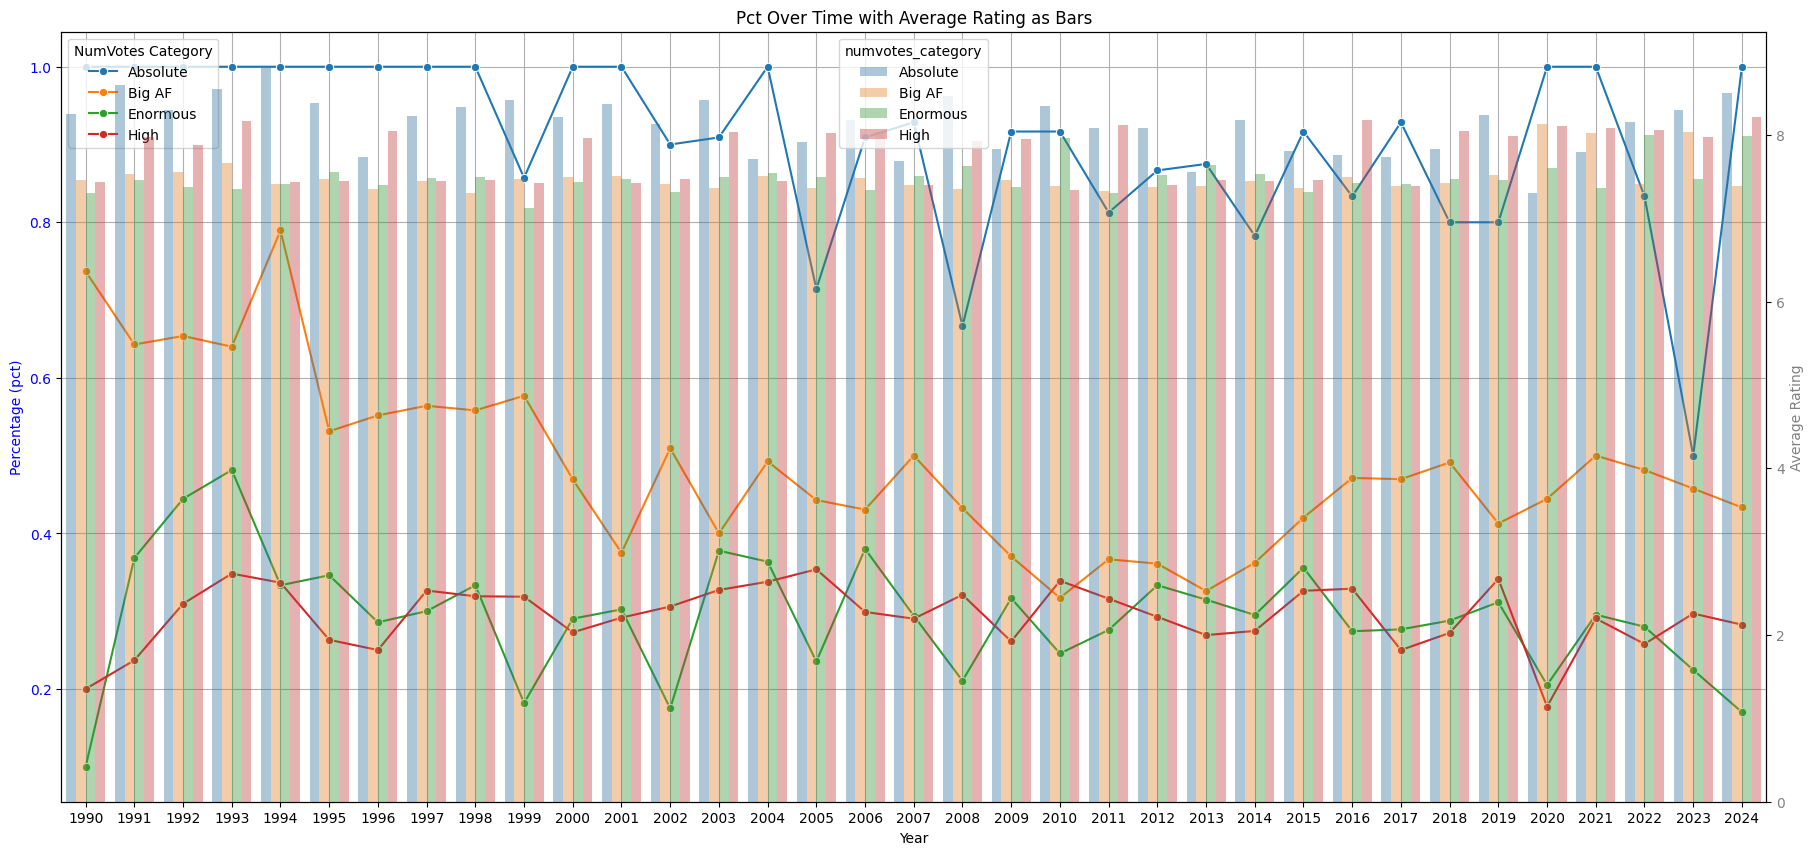

In [52]:
# Plot 'pct' over time for each 'numvotes_category'

grouped2=grouped[(grouped['numvotes_category'].isin(['High','Enormous','Big AF','Absolute']))&(grouped['rating_category'].isin(['good','amazing']))&(grouped['startYear'].astype(int)>=1990)].groupby(['startYear', 'numvotes_category']).agg({'averageRating': 'mean', 'total_count': 'mean', 'count': 'count','pct': 'sum'})
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped2, x='startYear', y='pct', hue='numvotes_category', marker='o')

# Formatting
ax1.set_ylabel('Percentage (pct)', color='blue')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(title='NumVotes Category', loc='upper left')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'averageRating'
sns.barplot(data=grouped2, x='startYear', y='averageRating', alpha=0.4, hue='numvotes_category', ax=ax2)
ax2.set_ylabel('Average Rating', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')
#plt.xticks(rotation=90)

plt.show()

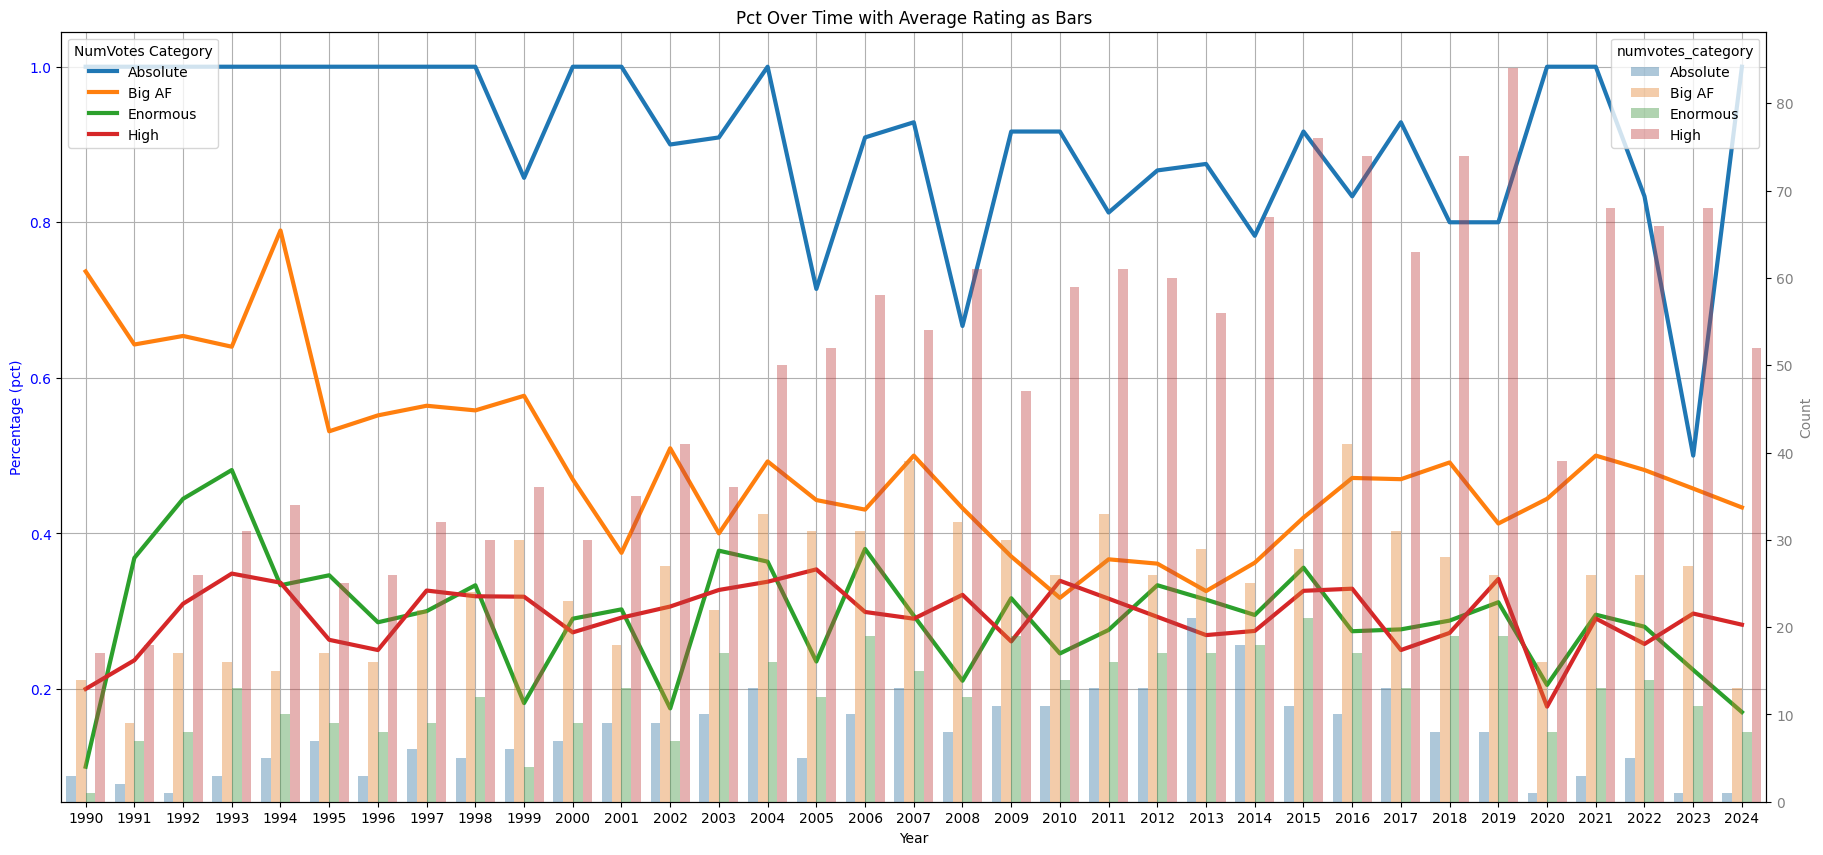

In [53]:
# Plot 'pct' over time for each 'numvotes_category'

grouped2=grouped[(grouped['numvotes_category'].isin(['High','Enormous','Big AF','Absolute']))&(grouped['rating_category'].isin(['good','amazing']))&(grouped['startYear'].astype(int)>=1990)].groupby(['startYear', 'numvotes_category']).agg({'averageRating': 'mean', 'total_count': 'mean', 'count': 'sum','pct': 'sum'})
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped2, x='startYear', y='pct', hue='numvotes_category',linewidth = 3)

# Formatting
ax1.set_ylabel('Percentage (pct)', color='blue')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(title='NumVotes Category', loc='upper left')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'averageRating'
sns.barplot(data=grouped2, x='startYear', y='count', alpha=0.4, hue='numvotes_category', ax=ax2)
ax2.set_ylabel('Count', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')
#plt.xticks(rotation=90)

plt.show()

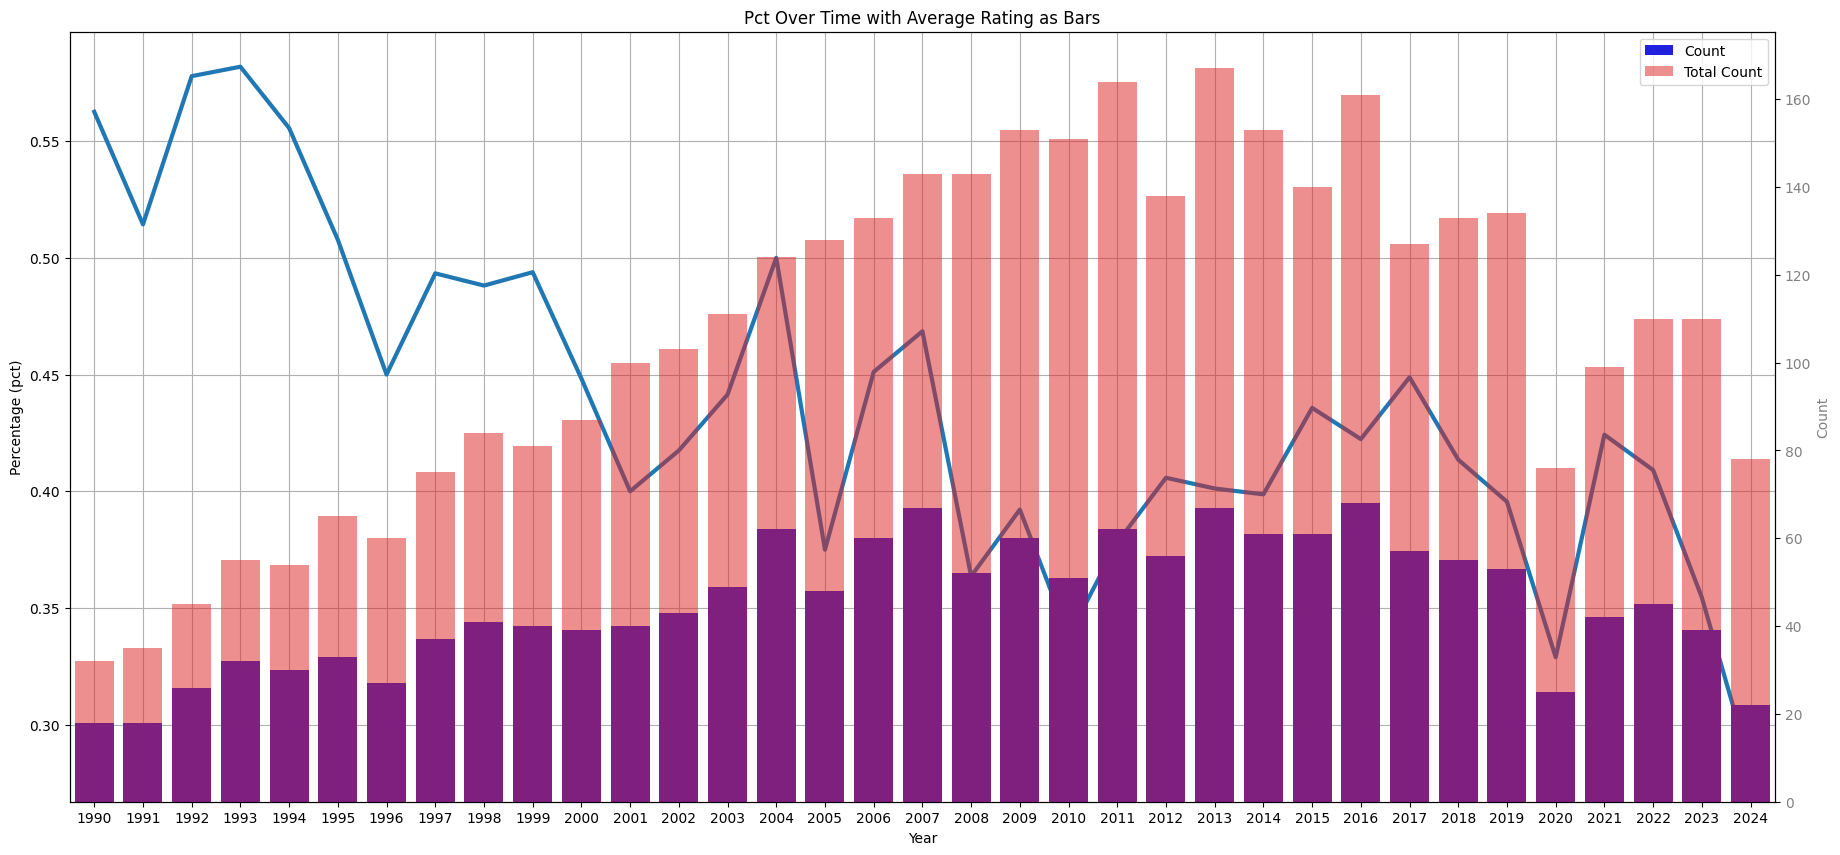

In [54]:
# Plot 'pct' over time for each 'numvotes_category'
# Group by all three columns and count tconst
grouped3 = movie_ratings_db[movie_ratings_db['numvotes_category'].isin(['Enormous','Big AF','Absolute'])].groupby(['startYear', 'rating_category']).agg({'averageRating': 'mean', 'numVotes': 'mean', 'tconst': 'count'}).rename(columns={'tconst': 'count'})

# Group by only 'startYear' and 'numvotes_category' to get total count per main category
total_counts2 = movie_ratings_db[movie_ratings_db['numvotes_category'].isin(['Enormous','Big AF','Absolute'])].groupby(['startYear']).agg({'averageRating': 'mean', 'tconst': 'count'}).rename(columns={'averageRating':'averageRating_all','tconst': 'total_count'})

# Merge to calculate 'pct'
grouped3 = grouped3.merge(total_counts2, left_index=True, right_index=True)
grouped3['pct'] = grouped3['count'] / grouped3['total_count']
grouped3 = grouped3.reset_index()
grouped4=grouped3[grouped3['rating_category'].isin(['good','amazing'])].groupby(['startYear']).agg({'averageRating_all': 'mean', 'total_count': 'mean', 'count': 'sum','pct': 'sum'}).reset_index()
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped4[grouped4['startYear'].astype(int)>=1990], x='startYear', y='pct',linewidth = 3)

# Formatting
ax1.set_ylabel('Percentage (pct)', color='black')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'count'
sns.barplot(data=grouped4[grouped4['startYear'].astype(int) >= 1990], x='startYear', y='count', color='blue', ax=ax2, label='Count')

# Bar chart for 'total_count' (overlapping bars)
sns.barplot(data=grouped3[grouped3['startYear'].astype(int) >= 1990], x='startYear', y='total_count', alpha=0.5, color='red', ax=ax2, label='Total Count')
ax2.set_ylabel('Count', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')

plt.show()

<ipython-input-55-cead456465d8>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(title='NumVotes Category', loc='upper left')


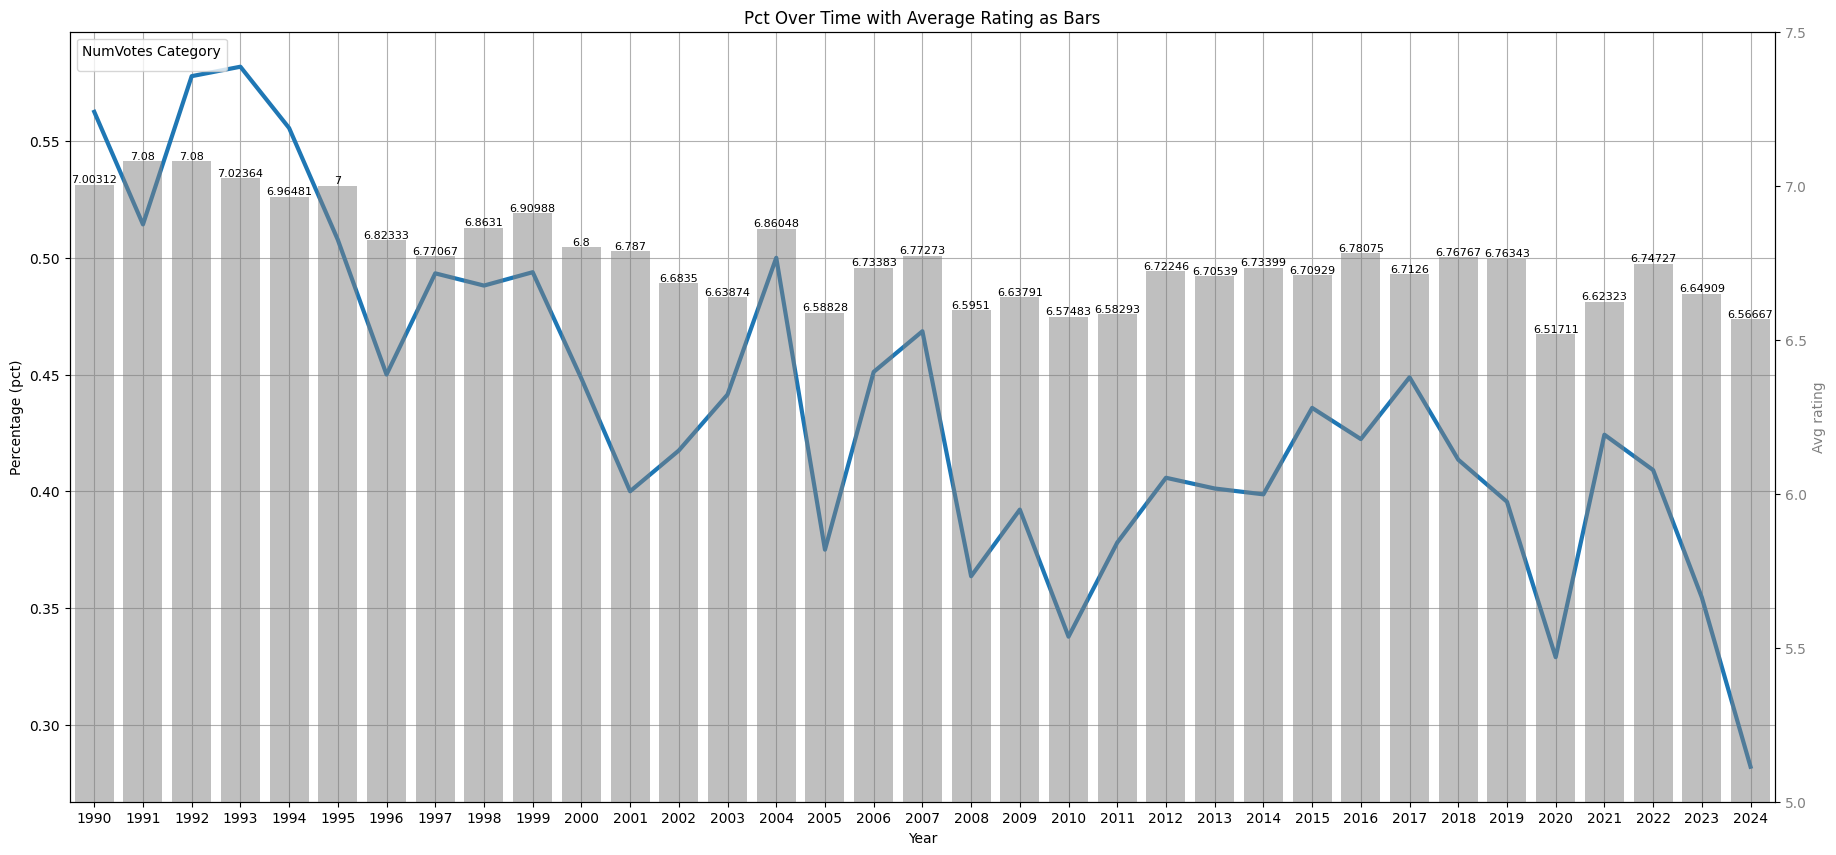

In [55]:
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped4[grouped4['startYear'].astype(int)>=1990], x='startYear', y='pct',linewidth = 3)

# Formatting
ax1.set_ylabel('Percentage (pct)', color='black')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(title='NumVotes Category', loc='upper left')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'averageRating'
sns.barplot(data=grouped3[grouped3['startYear'].astype(int)>=1990].groupby('startYear')['averageRating_all'].mean().reset_index(), x='startYear', y='averageRating_all', alpha=0.5, color='grey', ax=ax2)
ax2.set_ylabel('Avg rating', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')
ax2.bar_label(ax2.containers[0], fontsize=8)
ax2.set_ylim(5, 7.5)


# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')
#plt.xticks(rotation=90)

plt.show()